# Relacion entre varios factores para determinar el exito de la app

Se determina exito como numero de descargas (installs, en el dataset). Lo que se busca es que tanto influyen los factores de precio, critica y puntuacion de una aplicacion. 

In [101]:
import os 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn

In [102]:
data_set = pd.read_csv('googleplaystore-transformed.csv')

In [103]:
data_set.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,¡Ay Caramba!,FAMILY,0.0,0,549000,1,Paid,1.99,Everyone,Education,2014-06-13T00:00:00Z,1.2,3.0 and up
1,¡Ay Metro!,GAME,3.8,489,36M,10000,Free,0.00,Everyone 10+,Arcade,2015-03-17T00:00:00Z,1.0.3.1,4.0 and up
2,¿Es Vegan?,FOOD_AND_DRINK,4.6,438,1.7M,10000,Free,0.00,Everyone,Food & Drink,2017-08-01T00:00:00Z,2.2.3,3.0 and up
3,/u/app,COMMUNICATION,4.7,573,53M,10000,Free,0.00,Mature 17+,Communication,2018-07-03T00:00:00Z,4.2.4,4.1 and up
4,.R,TOOLS,4.5,259,203k,10000,Free,0.00,Everyone,Tools,2014-09-16T00:00:00Z,1.1.06,1.5 and up


In [104]:
compressed = data_set[['Installs', 'Price', 'Reviews', 'Rating']]

In [105]:
compressed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9602 entries, 0 to 9601
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Installs  9602 non-null   int64  
 1   Price     9602 non-null   float64
 2   Reviews   9602 non-null   int64  
 3   Rating    9602 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 300.2 KB


In [106]:
compressed.corr()

,Installs,Price,Reviews,Rating
Installs,1.000000,-0.009449,0.625136,0.069735
Price,-0.009449,1.000000,-0.007632,-0.015150
Reviews,0.625136,-0.007632,1.000000,0.064105
Rating,0.069735,-0.015150,0.064105,1.000000


A continuacion se grafico un mapa de calor, segun sea la relacion entre estos factores.

Mientras mas rojo se encuentre el cuadro, mayor es la relacion

<AxesSubplot:>

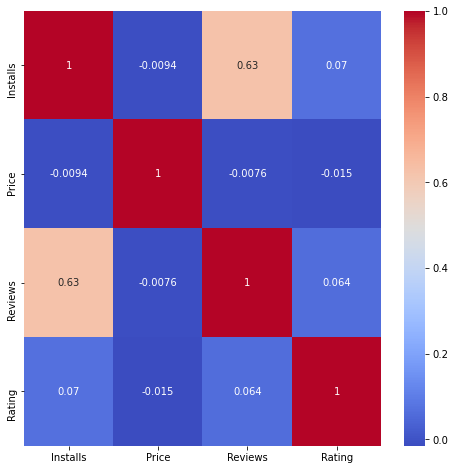

In [108]:
plt.figure(figsize=(8,8))
seaborn.heatmap(compressed.corr(), annot=True, cmap="coolwarm")

En conclusion como se pudo observar, solo hay una relacion positiva entre estos factores que determina que tan exitosa es o sera la aplicacion; la cantidad de criticas que reciba esta. Ya sean buenas o malas. 

Como se puede apreciar, existe una relacion inversa en el grafico, entre numero de descargas y el precio. Por lo que podemos inferir que mientras mas sea el precio de una aplicacion afecta negativamente el numero de descargas de esta.

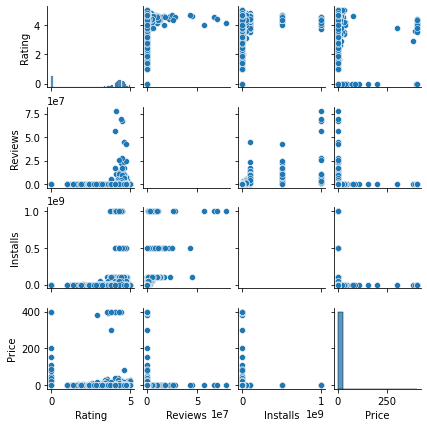

In [109]:
data_plot = data_set.dropna()
seaborn.pairplot(data_plot, height=1.5)